In [1]:
from data_and_denoising import *
from portfolio_construction import *

In [2]:
tickers = getTickers()
end = dt.now()
start = dt.fromisoformat('2015-01-01')

In [3]:
data = getData(start, end, tickers[0:3], True) 

Data was loaded sucessfully!


In [4]:
indicies_to_remove = data.isna().sum().sort_values(ascending=False).head(40).index

In [5]:
data.drop(indicies_to_remove, axis = 1, inplace = True)

In [6]:
m = getCorrMatrix(data)

In [19]:
m.shape

(423, 423)

In [8]:
eVal0, eVec0, eVal1, eVec1, corr1, var0 = denoiseMatrix(m, 1)

/Users/dario/Desktop/Projects/thesis/algorithm/data_and_denoising.py:54: RuntimeWarning: divide by zero encountered in divide
  pdf=q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5
/Users/dario/Desktop/Projects/thesis/algorithm/data_and_denoising.py:54: RuntimeWarning: invalid value encountered in multiply
  pdf=q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5
/Users/dario/Desktop/Projects/thesis/algorithm/data_and_denoising.py:54: RuntimeWarning: divide by zero encountered in divide
  pdf=q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5
/Users/dario/Desktop/Projects/thesis/algorithm/data_and_denoising.py:54: RuntimeWarning: invalid value encountered in multiply
  pdf=q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5
/Users/dario/Desktop/Projects/thesis/algorithm/data_and_denoising.py:54: RuntimeWarning: divide by zero encountered in divide
  pdf=q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5
/Users/dario/Desktop/Projects/thesis/algorithm/data_and_denoising.py:54: RuntimeWar

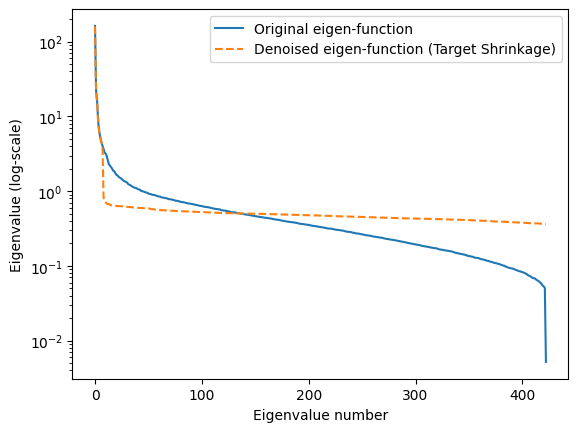

In [9]:
plotEvalDiff(eVal0, eVal1, 2)

In [12]:
corr2 = detoneMatrix(corr1, eVal1, eVec1)

In [15]:
w = optPort_nco(corr2, maxNumClusters = 3)

maxNumClusters3


100%|██████████| 2/2 [00:07<00:00,  3.74s/it]


In [22]:
w[50]

array([0.00094214])

In [35]:
w_ = w.reshape(-1)

In [36]:
data["port_ret"] =  wscore = data.apply(lambda row: np.average(row, weights = w_), axis=1)

In [38]:
data["cum_ret"] = np.cumprod(1 + data['port_ret'].values) - 1

In [68]:
ref = downloadReturns(start, end, ["SPY"])

In [69]:
ref["spx_ret"] = np.cumprod(1 + ref['SPY'].values) - 1

In [70]:
ref.drop("SPY", axis = 1, inplace = True)

In [75]:
ref.index = ref.index.astype(str)

In [76]:
rets = pd.DataFrame(data["cum_ret"]).merge(ref, how = "outer", left_index = True, right_index = True)

In [81]:
rets

,cum_ret,spx_ret
Date,,
2012-10-15,0.007268,NaN
2012-10-16,0.017928,NaN
2012-10-17,0.021807,NaN
2012-10-18,0.021875,NaN
2012-10-19,0.006155,NaN
...,...,...
2022-10-10,2.529645,0.752519
2022-10-11,2.520783,0.741420
2022-10-12,NaN,0.735676


In [83]:
import seaborn as sb

In [85]:
rets_ = rets.dropna(axis = 0, how = "any")

In [86]:
rets_.resample("M")

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

KeyboardInterrupt: 

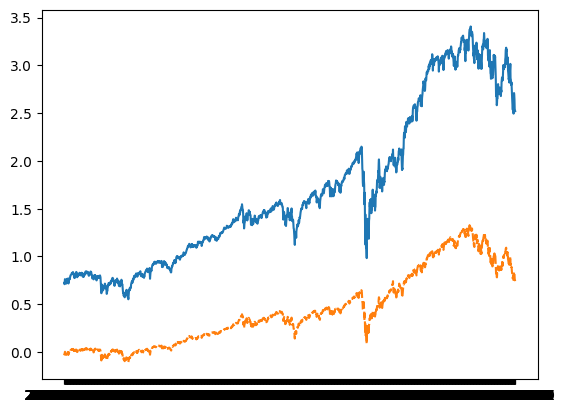

In [87]:
sb.lineplot(rets_)